In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 
import pandas as pd
import os 
import sklearn

In [2]:
DATASET_PATH = "./dataset/top/"
print(os.listdir(DATASET_PATH))

['.gitkeep', 'hood', 'knit,sweater', 'longsleeve', 'shirts,blouse', 'short_sleeve', 'sleeveless', 'sweatshirt']


In [3]:
categories = []
filenames = []
images = []

df = pd.DataFrame(columns=['category', 'filename', 'image'])
for folder in os.listdir(DATASET_PATH)[1:]:
    for file in os.listdir(os.path.join(DATASET_PATH, folder)):
        categories.append(folder)  
        filenames.append(file)
        images.append(os.path.join(DATASET_PATH, folder, file))

df['category'] = categories
df['filename'] = filenames
df['image'] = images
display(df)

df = df.iloc[np.random.permutation(df.index)].reset_index(drop=True)
display(df)

category  filename                              image
0           hood     1.jpg           ./dataset/top/hood\1.jpg
1           hood    10.jpg          ./dataset/top/hood\10.jpg
2           hood   100.jpg         ./dataset/top/hood\100.jpg
3           hood   101.jpg         ./dataset/top/hood\101.jpg
4           hood   102.jpg         ./dataset/top/hood\102.jpg
...          ...       ...                                ...
8011  sweatshirt   998.jpg   ./dataset/top/sweatshirt\998.jpg
8012  sweatshirt   999.jpg   ./dataset/top/sweatshirt\999.jpg
8013  sweatshirt  text.txt  ./dataset/top/sweatshirt\text.txt
8014  sweatshirt   url.txt   ./dataset/top/sweatshirt\url.txt
8015  sweatshirt   맨투맨.txt   ./dataset/top/sweatshirt\맨투맨.txt

[8016 rows x 3 columns]

category  filename                               image
0        longsleeve   880.jpg    ./dataset/top/longsleeve\880.jpg
1        longsleeve   663.jpg    ./dataset/top/longsleeve\663.jpg
2     shirts,blouse    56.jpg  ./dataset/top/shirts,blouse\56.jpg
3     shirts,blouse    74.jpg  ./dataset/top/shirts,blouse\74.jpg
4     shirts,blouse    31.jpg  ./dataset/top/shirts,blouse\31.jpg
...             ...       ...                                 ...
8011     sweatshirt   886.jpg    ./dataset/top/sweatshirt\886.jpg
8012     sweatshirt   586.jpg    ./dataset/top/sweatshirt\586.jpg
8013     sweatshirt  1286.jpg   ./dataset/top/sweatshirt\1286.jpg
8014     longsleeve  1255.jpg   ./dataset/top/longsleeve\1255.jpg
8015     longsleeve   173.jpg    ./dataset/top/longsleeve\173.jpg

[8016 rows x 3 columns]

In [4]:
df.head(10)

category  filename                               image
0     longsleeve   880.jpg    ./dataset/top/longsleeve\880.jpg
1     longsleeve   663.jpg    ./dataset/top/longsleeve\663.jpg
2  shirts,blouse    56.jpg  ./dataset/top/shirts,blouse\56.jpg
3  shirts,blouse    74.jpg  ./dataset/top/shirts,blouse\74.jpg
4  shirts,blouse    31.jpg  ./dataset/top/shirts,blouse\31.jpg
5     longsleeve  1059.jpg   ./dataset/top/longsleeve\1059.jpg
6           hood   257.jpg          ./dataset/top/hood\257.jpg
7     sleeveless  1031.jpg   ./dataset/top/sleeveless\1031.jpg
8   knit,sweater     9.jpg    ./dataset/top/knit,sweater\9.jpg
9     sleeveless  1471.jpg   ./dataset/top/sleeveless\1471.jpg

In [5]:
len(df)

8016

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# 딕셔너리 데이터를 인자값을 받아서 이미지를 출력한다.
def plot_figures(figures, nrows = 1, ncols=1,figsize=(5, 3)):    
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout()

In [10]:
# 이미지 경로를 읽어서 numpy로 변환한다.
# 기본 0.1 비율로 리사이즈를 처리한다.
def load_image(img_path, resized_fac = 1):
    img  = cv2.imread(img_path)
    w, h, _ = img.shape
    resized = cv2.resize(img, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    return resized

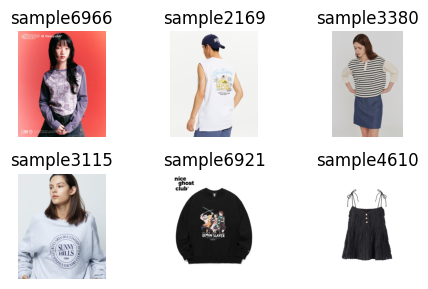

In [11]:
figures = {'sample'+str(i) : load_image(row.image) for i, row in df.sample(6).iterrows()}
figures.keys()
plot_figures(figures, 2, 3)


<Axes: ylabel='category'>

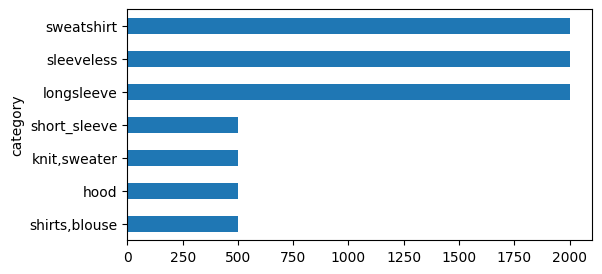

In [12]:
# 막대 그래프로 타입별로 갯수 출력
plt.figure(figsize=(6, 3))
df.category.value_counts().sort_values().plot(kind='barh')

In [13]:
import tensorflow as tf
import keras
from keras import Model
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
print(tf.__version__)
print(keras.__version__)


2.15.1
2.15.0


In [14]:
# 파이썬은 3.11.8
# !pip install --upgrade tensorflow==2.15.1

In [15]:
# 입력 이미지
img_width, img_height, img_channel = 224, 224, 3

# 훈련된 모델 사용
base_model = ResNet50(weights='imagenet', include_top=False, input_shape = (img_width, img_height, img_channel))
base_model.trainable = False

model = keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [16]:
def get_embedding(model, img_path):
    # Pillow 이미지 로드
    img = image.load_img(img_path, target_size=(img_width, img_height))
    # numpy 데이터로 변환 (224, 224, 3)
    x = image.img_to_array(img)
    # 차원을 추가해준다. (1, 224, 224, 3)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    # 1차원의 배열로 재배열해준다. [[5.232, 2.12, ...]] -> [5.232, 2.12, ...]
    return model.predict(x).reshape(-1)

In [17]:
# 첫 행 이미지 임베딩을 출력
emb = get_embedding(model, df.iloc[0].image)
emb.shape

1/1 [==============================] - 1s 791ms/step


(2048,)

In [18]:
df.iloc[0].image

'./dataset/top/longsleeve\\880.jpg'

(667, 500, 3)
[ 3.0021768  6.1476355  4.8446145 ... 10.483516  11.838696   3.9952593]


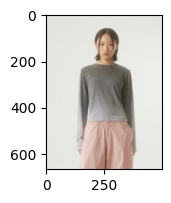

In [19]:
# 첫 행 이미지 시각화
img_array = load_image(df.iloc[0].image)
plt.figure(figsize = (2,2))
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
print(img_array.shape)
print(emb)

In [20]:
#%%time

# 전체 데이터 임베딩
df_sample = df
map_embeddings = df_sample['image'].apply(lambda img: get_embedding(model, img))
df_embs = map_embeddings.apply(pd.Series)

print(df_embs.shape)
df_embs.head()

1/1 [==============================] - 0s 84ms/step


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000020ACF9912B0>

In [ ]:
df_embs.shape

NameError: name 'df_embs' is not defined

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# cosine 거리 계산
pairwise_distances(df_embs, metric='cosine')

# 정규화
cosine_sim = 1 - pairwise_distances(df_embs, metric='cosine')
cosine_sim[:4, :4]

array([[0.99999946, 0.6199594 , 0.5516245 , 0.5758186 ],
       [0.6199594 , 0.99999976, 0.6337676 , 0.6472562 ],
       [0.5516245 , 0.6337676 , 0.9999999 , 0.59359336],
       [0.5758186 , 0.6472562 , 0.59359336, 0.9999987 ]], dtype=float32)

In [ ]:
indices = pd.Series(range(len(df)), index=df.index)

def get_recommender(idx, df, top_n = 5):
    sim_idx = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim

In [ ]:
def get_recommender_for_external(external_emb, df, top_n=5):
    # 외부 데이터 포인트를 df의 임베딩과 비교하기 위해 코사인 유사도 계산
    sim_scores = list(enumerate(1 - pairwise_distances([external_emb], df_embs, metric='cosine')[0]))
    
    # 유사도 점수를 내림차순으로 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # 상위 N개의 유사한 인덱스와 점수 선택
    idx_rec = [i[0] for i in sim_scores[:top_n]]
    idx_sim = [i[1] for i in sim_scores[:top_n]]
    
    return df.index[idx_rec], idx_sim

In [ ]:
get_recommender_for_external(test_img, df, top_n = 10)

(Index([140, 2098, 842, 1181, 2838, 2092, 2367, 2792, 1754, 402], dtype='int64'),
 [0.7895315,
  0.7761969,
  0.76179206,
  0.75681406,
  0.7540897,
  0.75399315,
  0.753217,
  0.7504978,
  0.7500118,
  0.74823207])

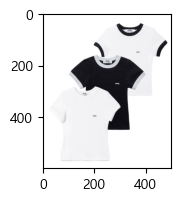

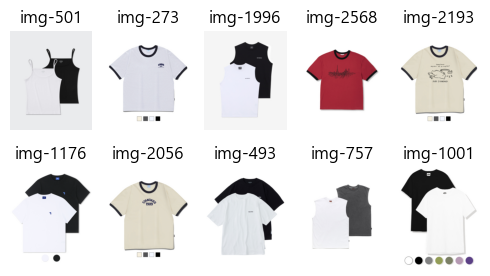

In [ ]:
# 유사한 데이터 출력해보기
idx_ref = 8
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 10)
# print(idx_rec, idx_sim)
plt.figure(figsize = (2,2))
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

figures = {'img-'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
plot_figures(figures, 2, 5)

In [ ]:
from sklearn.manifold import TSNE
import time
import seaborn as sns

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_embs)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 5.1238250732421875 seconds


<Axes: xlabel='number', ylabel='distance'>

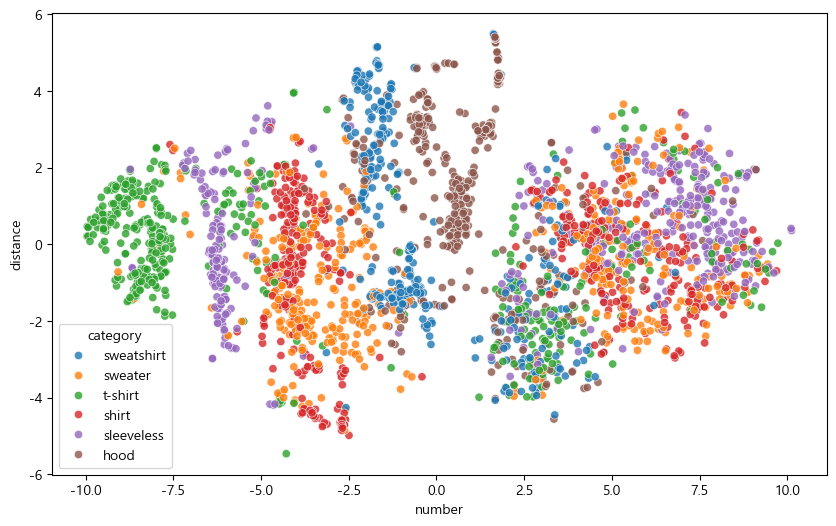

In [ ]:
df['number'] = tsne_results[:,0]
df['distance'] = tsne_results[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(x="number", y="distance", hue="category", data=df, legend="full", alpha=0.8)

1/1 [==============================] - 0s 161ms/step


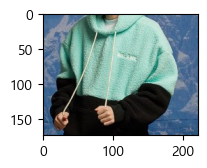

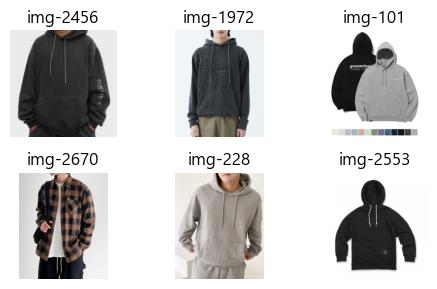

In [ ]:
# 테스트 이미지 임베딩
test_img = ".\\test_image\\testt.png"
test_emb = get_embedding(model, test_img)

# 유사한 데이터 찾기
idx_rec_test, idx_sim_test = get_recommender_for_external(test_emb, df, top_n = 6)

# 테스트 이미지 출력
plt.figure(figsize = (2,2))
plt.imshow(cv2.cvtColor(load_image(test_img), cv2.COLOR_BGR2RGB))

# 유사한 이미지 출력
figures = {'img-'+str(i): load_image(row.image) for i, row in df.loc[idx_rec_test].iterrows()}
plot_figures(figures, 2, 3)